# Deep Learning with KERAS 2

# Training and visualising a multilayer perceptron

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

This notebook introduces the training and visualisation of a multilayer perceptron (MLP) 
The MLP is trained on the well-known MNIST dataset of handwritten digits. Each instance is a 28 x 28 pixel grayscale image and there are 10 targets (labels), i.e., '0', '1', .... '9'.
The MNIST dataset consists of 60,000 training instances and 10,000 test 
instances. 

KERAS provides the MNIST dataset as a set of Numpy arrays: the training instances, the associated labels, the test instances and the associated labels.

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The MLP is trained on the training instances by presenting them together with their labels to the network. Below, we examine the shape of the training instances.

In [3]:
train_images.shape

(60000, 28, 28)

The $6000$ images are represented in a 3-dimensional array. Let's visualise the first $72$ images. (It may take some time before they appear.)

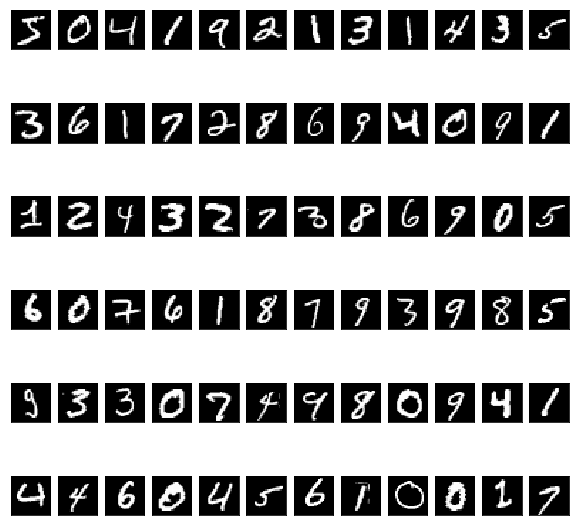

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for h in range(0,6*12):
    plt.subplot(6,12,h+1)
    plt.imshow(train_images[h].reshape(28,28), cmap=plt.get_cmap('gray'))
    # remove axes
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    
fig = plt.gcf()
fig.set_size_inches(10, 10)
# show the plot
plt.show()

We now turn to the training labels. Their number should equal the number of images (60000).

In [5]:
len(train_labels)

60000

What are the unique labels? (Should be '0' to '9')

In [6]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

It is good machine-learning practise to examine if the different classes are more or less balanced... 

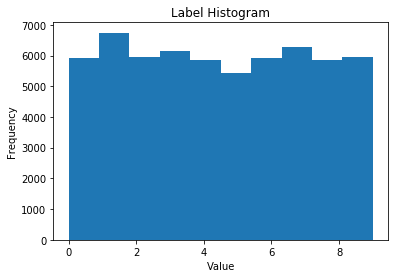

In [7]:

plt.hist(train_labels)

plt.title("Label Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()


There seems to be a bit variation, but roughly speaking the dataset is well balanced. 
Let's have a look at the test data:

In [8]:
test_images.shape

(10000, 28, 28)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

Let's build our network. It consists of an input layer of $28 \times 28$ elements (each pixel value is an input, and the image matrix is represented in a vector of length $28^2$). The input layer is fully connected to a so-called hidden layer consisting of `hidden` neurons. (The hyperparameter `hidden` is currently set to 4. Changing it will affect the visualisation parts below.) The transfer functions of the neurons in the hidden layer are defined as either sigmoid or rectified linear unit (relu) functions. The hidden layer is fully connected with the output layer which has $10$ outputs, one for each class. 

In [9]:
from keras import models
from keras import layers

# number of hidden neurons can vary from 1 to 16
hidden = 16
network = models.Sequential()
network.add(layers.Dense(hidden, use_bias='true', activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(10, use_bias='true', activation='softmax'))

In [10]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05)


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). We used the same layer in the first hands-on session. Each  score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next lectures. Please note that the optimizer features two hyperparameters that we discussed in class: the learning rate (lr) and the momentum.

In [11]:
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain later in the course:

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [14]:
network.fit(train_images, train_labels, epochs=200, batch_size=128)

Epoch 1/200
60000/60000 [==============================] - 1s 17us/step - loss: 2.2101 - acc: 0.2923
Epoch 2/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.9512 - acc: 0.6266
Epoch 3/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.7223 - acc: 0.6993
Epoch 4/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.5189 - acc: 0.7361
Epoch 5/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.3464 - acc: 0.7606
Epoch 6/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.2045 - acc: 0.7830
Epoch 7/200
60000/60000 [==============================] - 1s 13us/step - loss: 1.0889 - acc: 0.7989
Epoch 8/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.9944 - acc: 0.8136
Epoch 9/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.9166 - acc: 0.8238
Epoch 10/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.8519 - a

60000/60000 [==============================] - 1s 13us/step - loss: 0.2957 - acc: 0.9187
Epoch 82/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2945 - acc: 0.9190
Epoch 83/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2933 - acc: 0.9194
Epoch 84/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2921 - acc: 0.9196
Epoch 85/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2910 - acc: 0.9202
Epoch 86/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2898 - acc: 0.9201
Epoch 87/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.2887 - acc: 0.9204
Epoch 88/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2876 - acc: 0.9208
Epoch 89/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2865 - acc: 0.9210
Epoch 90/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2855 - acc: 

60000/60000 [==============================] - 1s 13us/step - loss: 0.2379 - acc: 0.9333
Epoch 161/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2374 - acc: 0.9336
Epoch 162/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2370 - acc: 0.9338
Epoch 163/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2365 - acc: 0.9338
Epoch 164/200
60000/60000 [==============================] - 1s 12us/step - loss: 0.2361 - acc: 0.9339
Epoch 165/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2357 - acc: 0.9340
Epoch 166/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2352 - acc: 0.9344
Epoch 167/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2348 - acc: 0.9344
Epoch 168/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.2344 - acc: 0.9345
Epoch 169/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.234

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

Now we check if our model performs well on the test set too:

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 22us/step


In [16]:
print('test_acc:', test_acc, '             test_loss:', format(round(test_loss,4)))

test_acc: 0.9353              test_loss: 0.2273


__Q1: By comparing the test accuracy with the training accuracy, you can establish the amount of overfitting. Determine by means of "early stopping" what the appropriate number of epochs is for training the MLP on this task, for which you obtain the minimal amount of overfitting.__

Please note that if you repeatedly train the MLP, you should re-initialize the network weights. The easiest and most efficient way of doing this is to rerun the entire notebook with the new settings.

__Q2: Examine the effect of varying the learning rate on the speed of learning. What maximum learning rate is associated with the optimal performance (loss or accuracy)?__

__Q3: Examine the effect of varying both the learning rate and the momentum. By keeping the number of epochs fixed, but sufficiently large (!), examine a range of equally-spaced values for both hyperparameters. Please note that the value of the momentum is constrained to the unit interval.__

We now turn to the visualisation of the weights of the hidden neurons, in the same manner we visualised the outputs of the 10 perceptrons in the previous exercise. 

In [17]:
W1 = network.layers[0].get_weights()[0]
W2 = network.layers[1].get_weights()[0]
WW = W1.reshape(28,28,hidden)
WW.shape

(28, 28, 16)

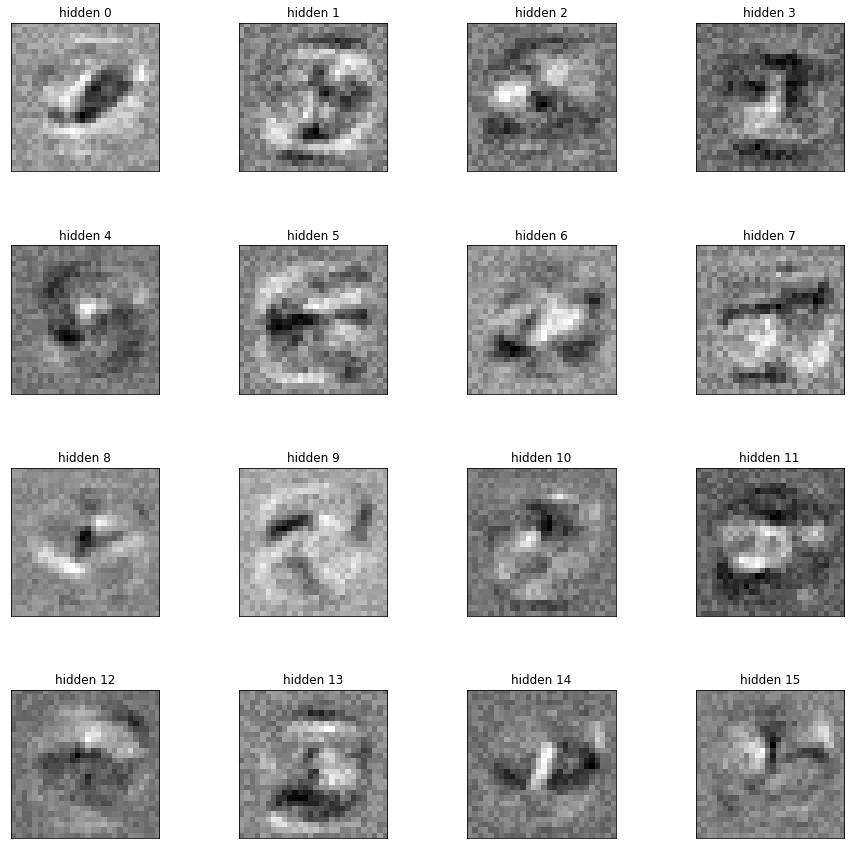

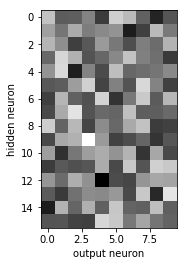

In [18]:
%matplotlib inline
for h in range(0,hidden):
    plt.subplot(4,4,h+1)
    plt.imshow(WW[:,:,h], cmap=plt.get_cmap('gray'), interpolation='none')
    plt.title('hidden '+str(h))
    # remove axes
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)

# adjust spacing between figures
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.5, hspace=.5)

fig = plt.gcf()
fig.set_size_inches(15, 15)


# show the plot
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.imshow(W2, cmap=plt.get_cmap('gray'), interpolation='none')
axes.set_ylabel('hidden neuron')
axes.set_xlabel('output neuron')
plt.show()

The pictures above show the weight matrices associated with the number of hidden neurons (as specified by the "hidden" hyperparameter). In addition, a visualisation of the weight matrix connecting the hidden neurons with the output neurons is shown. In all cases, the most negative weight value is mapped to black and the most positive weight value to white. Intermediate values are mapped to intermediate shades of grey. 

__Q4: In last-week's exercise, the weight matrices were clearly interpretable as templates for the then digits. Is that also the case here? Explain why.__

__Q5: The hidden-to-output weights reveal how hidden neurons contribute to certain outputs. Can you make sense of the mapping?__

__Q6: Vary the number of hidden neurons from 1 to 16 and determine the accuracy and loss (for both the train and test set) for each value of `hidden`. What is the effect of `hidden` on the generalisation performance (i.e., loss/accuracy on the test set) and on the amount of overfitting?__

__Q7: What is the effect of the number of hidden neurons on the nature of the weight visualisations?__